In [12]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import pylab
from PIL import Image
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
# from https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [2]:
coco_annotation = COCO("annotations/via3_coco.json")

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [3]:
 # Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

Number of Unique Categories: 2
Category IDs:
[1, 2]


In [4]:
# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

Categories Names:
['shark', 'human']


In [5]:
# Category ID -> Category Name.
query_id = cat_ids[0]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

Category ID -> Category Name:
Category ID: 1, Category Name: shark, Supercategory: object_label


In [7]:
# Category Name -> Category ID.
query_name = cat_names[1]
query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

Category Name -> ID:
Category Name: human, Category ID: 2


In [8]:
# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

Number of Images Containing human: 162


In [9]:
print(img_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162]


In [10]:
# Pick one image.
img_id = img_ids[2]
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_url = img_info["coco_url"]
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

Image ID: 3, File Name: 20200805_OneSharkSUPSurfers.mp4_3-5.jpg, Image URL: 


In [11]:
# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)


Annotations for Image ID 3:
[{'id': 203, 'image_id': 3, 'category_id': 1, 'segmentation': [[600, 1049.143, 651.429, 1049.143, 651.429, 1131.429, 600, 1131.429]], 'area': 4231.887, 'bbox': [600, 1049.143, 51.429, 82.286], 'iscrowd': 0}, {'id': 204, 'image_id': 3, 'category_id': 2, 'segmentation': [[2797.714, 428.571, 2869.714, 428.571, 2869.714, 541.714, 2797.714, 541.714]], 'area': 8146.296, 'bbox': [2797.714, 428.571, 72, 113.143], 'iscrowd': 0}, {'id': 205, 'image_id': 3, 'category_id': 2, 'segmentation': [[3408, 867.429, 3483.429, 867.429, 3483.429, 908.571, 3408, 908.571]], 'area': 3103.3, 'bbox': [3408, 867.429, 75.429, 41.142], 'iscrowd': 0}, {'id': 206, 'image_id': 3, 'category_id': 2, 'segmentation': [[3555.429, 939.429, 3586.286, 939.429, 3586.286, 1011.429, 3555.429, 1011.429]], 'area': 2221.704, 'bbox': [3555.429, 939.429, 30.857, 72], 'iscrowd': 0}, {'id': 207, 'image_id': 3, 'category_id': 2, 'segmentation': [[3682.286, 2022.857, 3747.429, 2022.857, 3747.429, 2118.857, 368

In [13]:
# Use URL to load image.
im = Image.open("images/20200805_OneSharkSUPSurfers.mp4_3-5.jpg")

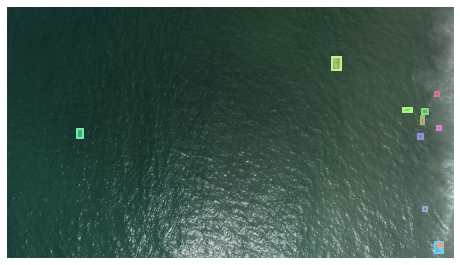

In [14]:
# Save image and its labeled version.
plt.axis("off")
plt.imshow(np.asarray(im))
plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
# Plot segmentation and bounding box.
coco_annotation.showAnns(anns, draw_bbox=True)
plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)